# Nodal Responses Visualization (Pyvista)

In [2]:
import openseespy.opensees as ops
import opstool as opst
import opstool.vis.pyvista as opsvis

In [3]:
opst.load_ops_examples("ArchBridge2")
# or your model code here

In [4]:
opsvis.set_plot_props(
    point_size=0,
    line_width=3,
    notebook=True,
)

OPSTOOL ::  Model data has been saved to _OPSTOOL_ODB/ModelData-None.nc!

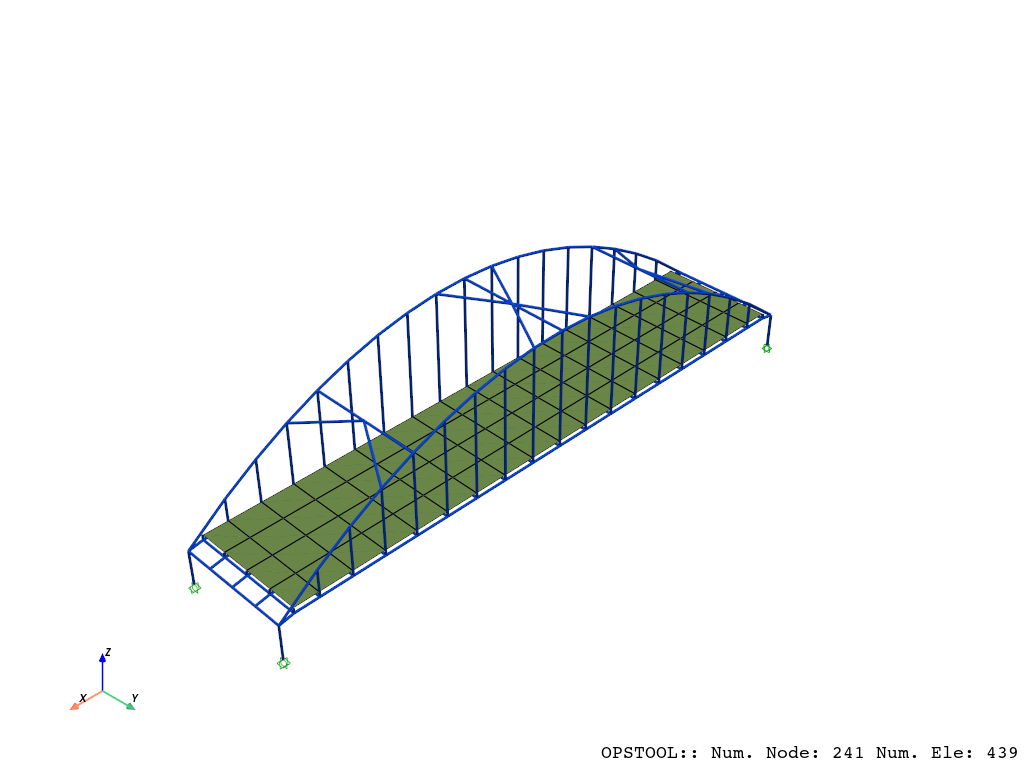

In [5]:
fig = opsvis.plot_model()
fig.show(jupyter_backend="jupyterlab")
# fig.show()

In [6]:
ops.timeSeries("Linear", 1)
ops.pattern("Plain", 1, 1)
opst.pre.gen_grav_load(factor=-9810)

In [7]:
ops.system("BandGeneral")
# Create the constraint handler, the transformation method
ops.constraints("Transformation")
# Create the DOF numberer, the reverse Cuthill-McKee algorithm
ops.numberer("RCM")
# Create the convergence test, the norm of the residual with a tolerance of
# 1e-12 and a max number of iterations of 10
ops.test("NormDispIncr", 1.0e-12, 10, 3)
# Create the solution algorithm, a Newton-Raphson algorithm
ops.algorithm("Newton")
# Create the integration scheme, the LoadControl scheme using steps of 0.1
ops.integrator("LoadControl", 0.1)
# Create the analysis object
ops.analysis("Static")

In [8]:
ODB = opst.post.CreateODB(odb_tag=1)
for i in range(10):
    ops.analyze(1)
    ODB.fetch_response_step()
ODB.save_response()

OPSTOOL ::  All responses data with odb_tag = 1 saved in _OPSTOOL_ODB/RespStepData-1.nc!

OPSTOOL ::  Loading response data from _OPSTOOL_ODB/RespStepData-1.nc ...

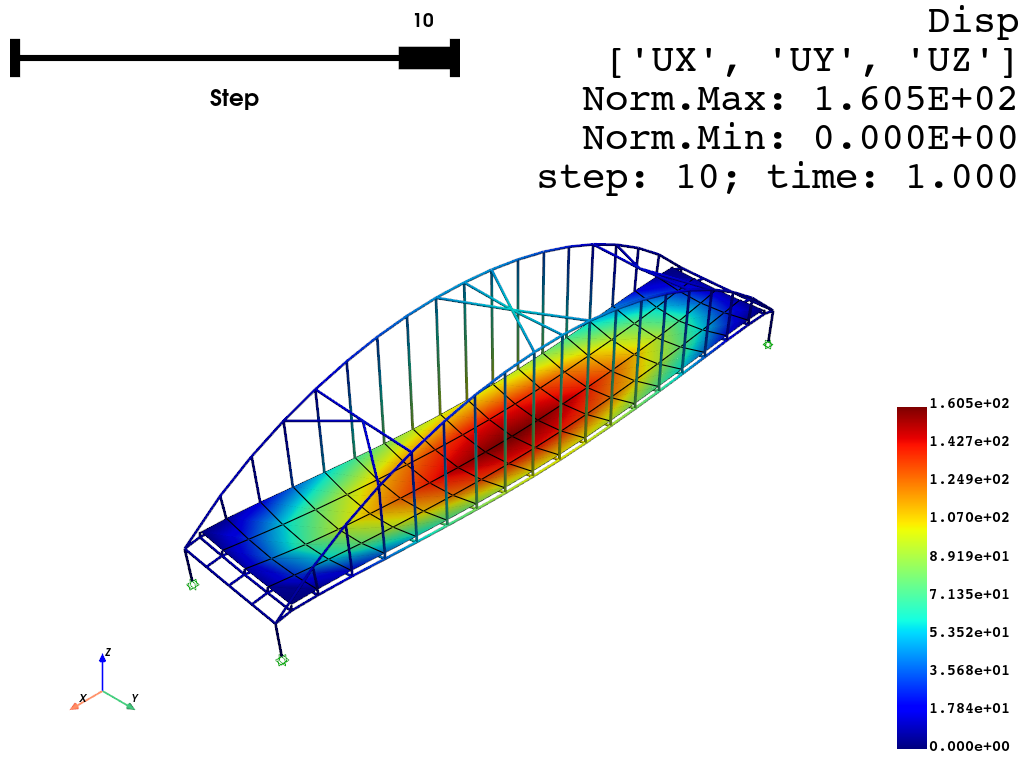

In [9]:
fig = opsvis.plot_nodal_responses(
    odb_tag=1, slides=True, resp_type="disp", resp_dof=["UX", "UY", "UZ"]
)
fig.show(jupyter_backend="jupyterlab")
# fig.show()